## **IMDB Movies Data Analysis**

In [152]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
# Loading the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/versions/1


In [34]:
# Checking the first 5 rows of the dataset
df = pd.read_csv(path + "/imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### **1. Data Preprocessing**

In [35]:
# Checking for missing, and duplicated values
def tech_info(data):
  print(f'The shape of the dataset: {data.shape}')
  print(f'The number of missing values: {data.isnull().sum().sum()}')
  print(f'The number of duplicated values {data.duplicated().sum()}')
  print(f'The number of unique values: {data.nunique().sum()}')

tech_info(df)

The shape of the dataset: (1000, 16)
The number of missing values: 427
The number of duplicated values 0
The number of unique values: 9238


In [36]:
# Checking the technical details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [37]:
# Dropping the NaN values for the [Certificate] column
df.dropna(subset=['Certificate'], inplace=True)

In [38]:
# Impute the [Meta_score] column with the mean
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

<ipython-input-38-38d69066e1f1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)


In [40]:
# Changing the Gross data type from object to float
df['Gross'] = df['Gross'].str.replace(',', '').replace('', np.nan).astype(float)

# Imputing NaN values in Gross column with the median statistic
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [43]:
# Displaying the statisticsl description of the dataset
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,899.000000,899.000000,8.990000e+02,8.990000e+02
mean,7.951279,77.560356,2.977690e+05,6.610795e+07
std,0.281987,11.508198,3.366486e+05,1.054811e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,72.000000,6.423600e+04,5.580981e+06
50%,7.900000,77.560356,1.664090e+05,2.686245e+07
75%,8.100000,85.000000,4.198995e+05,7.489133e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [46]:
# Dropping [Poster_Link] column
df.drop('Poster_Link', axis=1, inplace=True)

# Changing the data type of [Runtime] from object to integer
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Removing PG from [Released_Year] column
df['Released_Year'] = df['Released_Year'].str.replace('PG','')

# Changing the data type of [Released_Year] from object to datetime
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y')

### **2. Exploratory Data Analysis (EDA)**

### **General Statistics**

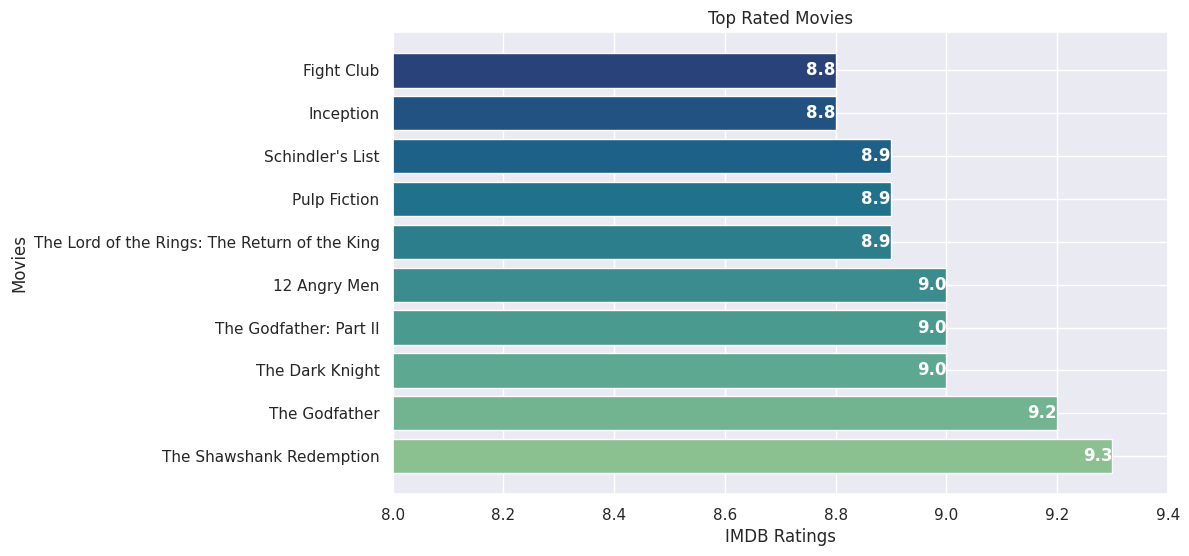

In [263]:
# Identifying and visualizing the top-rated movies based on imdb scores
top_rated_movies = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'IMDB_Rating']]

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("crest", len(top_rated_movies))


bars = ax.barh(top_rated_movies['Series_Title'], top_rated_movies['IMDB_Rating'], color=colors)

for bar in bars:
  xval = bar.get_width()
  ax.text(xval, bar.get_y() + bar.get_height()/ 2, f'{xval:.1f}', ha='right', va='center', color='white', fontweight='bold')

ax.set_xlabel('IMDB Ratings')
ax.set_ylabel('Movies')
ax.set_title('Top Rated Movies')
plt.xlim(8, 9.4)

plt.show()

**Insights:**

* All movies listed have an IMDB rating above 8.0, indicating they are critically acclaimed and highly appreciated by audiences.
* The Shawshank Redemption stands out as the clear leader with a rating of 9.3, setting a benchmark among top-rated movies.
* Many movies have very close ratings:
  * The Dark Knight, and The Godfather: Part II, and 12 Angry Men share the same rating of 9.0.
  * Similarly, Pulp Fiction, Schindler's List, and The Lord of the Rings: The Return of the King are tied at 8.9.


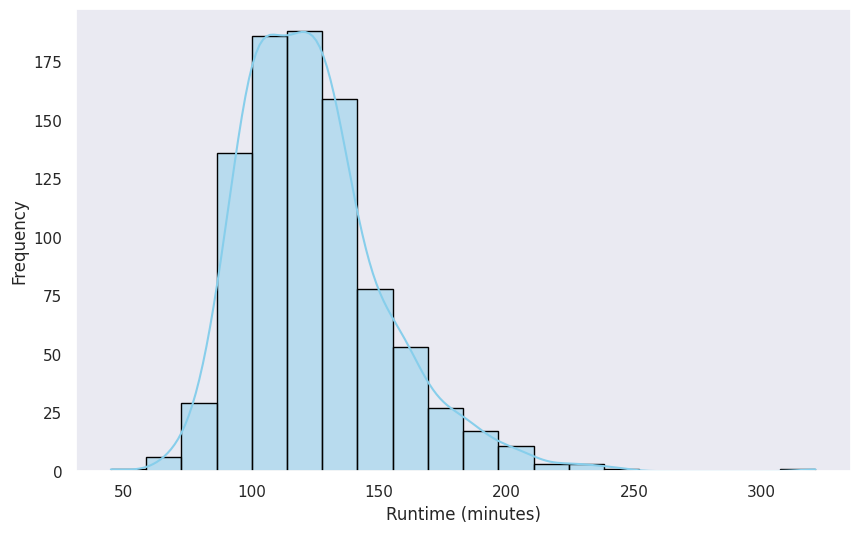

In [85]:
# Distribution of runtime movies
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**Insights**

* Most Common Runtime:
  * The peak frequency occurs around 100 to 120 minutes, indicating that most   movies have runtimes in this range.
* Distribution Shape:
  * The distribution appears to be right-skewed:
  * Most movies are clustered within the 100–150 minute range.
  * A smaller number of movies exceed 150 minutes.
* Shorter Movies:
  * Movies with runtimes below 90 minutes are relatively rare, suggesting that feature-length films tend to be longer.

In [87]:
# The median runtime of the movies
average_runtime = df['Runtime'].median()
print(f'The average runtime of the movies is {average_runtime:.2f} minutes.')

The average runtime of the movies is 120.00 minutes.


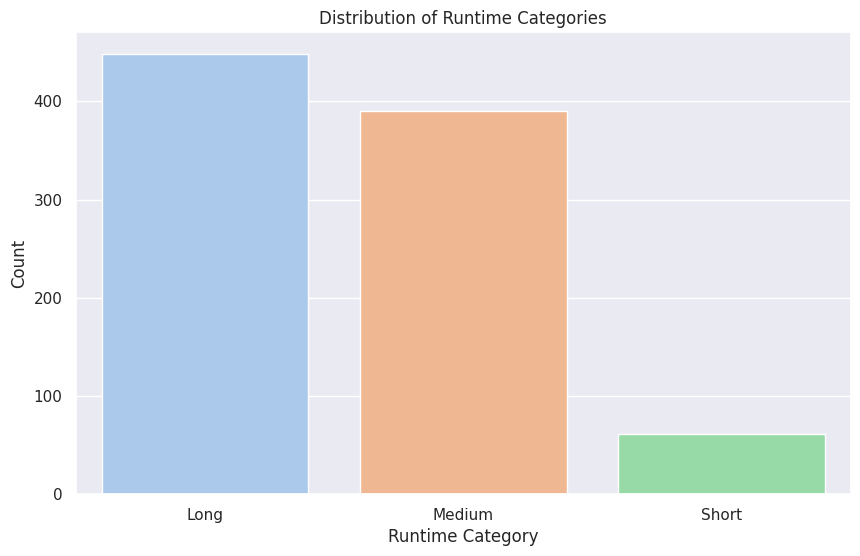

In [242]:
# Categorizing the movies based on their runtimes
def runtime_category(runtime):
  if runtime <= 90:
    return 'Short'
  elif runtime <=120:
    return 'Medium'
  else:
    return 'Long'

df['Runtime_Category'] = df['Runtime'].apply(runtime_category)

# Visualizing the categories using bar chart
plt.figure(figsize=(10, 6))
runtime_counts = df['Runtime_Category'].value_counts().sort_index()
sns.barplot(x=runtime_counts.index, y=runtime_counts.values, hue=runtime_counts.index, palette='pastel')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.title('Distribution of Runtime Categories')
plt.show()

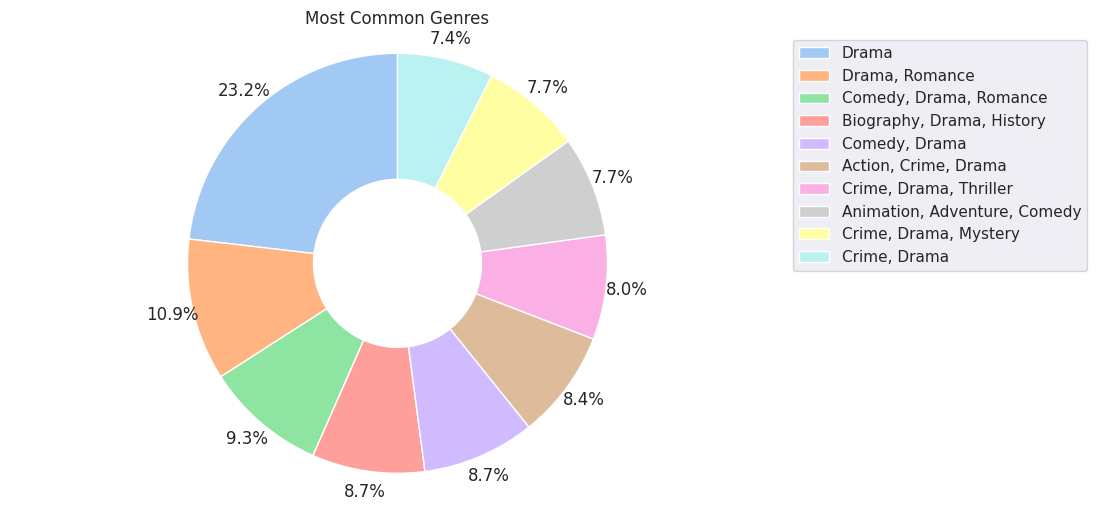

In [232]:
# Identifying the most common genres from the dataset
most_common_genres = df['Genre'].value_counts().head(10)

# Visualizing using pie chart
plt.figure(figsize=(10, 6))
plt.pie(most_common_genres.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'width': 0.6})
plt.title('Most Common Genres')
plt.axis('equal')
plt.legend(labels=most_common_genres.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Description of the chart**

* Dominant Genre:
  * Drama is the largest segment, accounting for **23.2%** of the total movies.
* Other Significant Genres:
  * Other combinations like Drama, Romance **(10.9%)** and Comedy, Drama, Romance **(9.3%)** are also common.
  * Action-based genres such as Action, Crime, Drama **(8.4%)** also hold a notable share.

**Insights**
* Drama appears as a core genre across multiple combinations (e.g., Drama, Crime, Drama, Comedy, Drama), highlighting its widespread appeal.
* While Drama dominates, the distribution of other genres is relatively balanced, indicating that audiences enjoy a variety of genres.

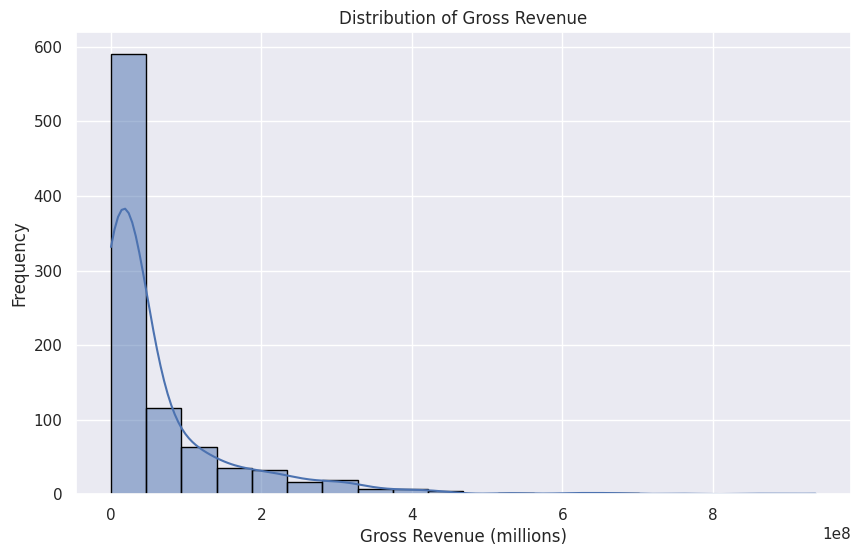

In [380]:
# The distribution of gross revenue of movies
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue (millions)')
plt.ylabel('Frequency')
plt.show()

**Insights**

* The distribution is right-skewed.
* Most of the movies clustered at around 0 - 1 millions in gross revenue.
* Small amount of movies earned gross revenue exceeding 1 million dollars.

In [146]:
# Top 10 grossing movies
top_grossing = df.nlargest(10, 'Gross')[['Series_Title', 'Gross']].reset_index(drop=True)
top_grossing['Gross'] = top_grossing['Gross'].astype(int)
top_grossing['Gross'] = top_grossing['Gross'].apply(lambda x: f'${x:,.0f}')
top_grossing

,Series_Title,Gross
0,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
1,Avengers: Endgame,"$858,373,000"
2,Avatar,"$760,507,625"
3,Avengers: Infinity War,"$678,815,482"
4,Titanic,"$659,325,379"
5,The Avengers,"$623,279,547"
6,Incredibles 2,"$608,581,744"
7,The Dark Knight,"$534,858,444"
8,Rogue One,"$532,177,324"
9,The Dark Knight Rises,"$448,139,099"


In [145]:
# Distribution of gross revenue by genre
genre_revenue = df.groupby('Genre')['Gross'].mean().sort_values(ascending=False).reset_index().head(10)
genre_revenue['Gross'] = genre_revenue['Gross'].astype(int)
genre_revenue['Gross'] = genre_revenue['Gross'].apply(lambda x: f"${x:,.0f}")
genre_revenue

,Genre,Gross
0,"Family, Sci-Fi","$435,110,554"
1,"Action, Adventure, Fantasy","$352,723,505"
2,"Action, Adventure, Family","$301,959,197"
3,"Action, Adventure, Sci-Fi","$280,888,545"
4,"Adventure, Fantasy","$280,685,211"
5,"Adventure, Thriller","$260,000,000"
6,"Animation, Comedy, Crime","$251,513,985"
7,"Action, Adventure","$229,507,242"
8,"Action, Adventure, Mystery","$209,028,679"
9,"Action, Adventure, Drama","$207,361,390"


### **Temporal Trends**

In [144]:
# Distribution of gross revenue by year
revenue_by_year = df.groupby(df['Released_Year'].dt.year)['Gross'].mean().sort_values(ascending=False).reset_index().head(10)
revenue_by_year['Released_Year'] = revenue_by_year['Released_Year'].astype(int)
revenue_by_year['Gross'] = revenue_by_year['Gross'].astype(int)
revenue_by_year['Gross'] = revenue_by_year['Gross'].apply(lambda x: f'${x:,.0f}')
revenue_by_year

,Released_Year,Gross
0,1977,"$164,676,258"
1,2018,"$144,319,453"
2,2010,"$124,499,668"
3,2009,"$118,533,866"
4,2012,"$118,007,539"
5,2019,"$112,816,514"
6,2015,"$108,222,411"
7,2017,"$104,391,984"
8,2016,"$100,111,378"
9,2008,"$99,043,728"


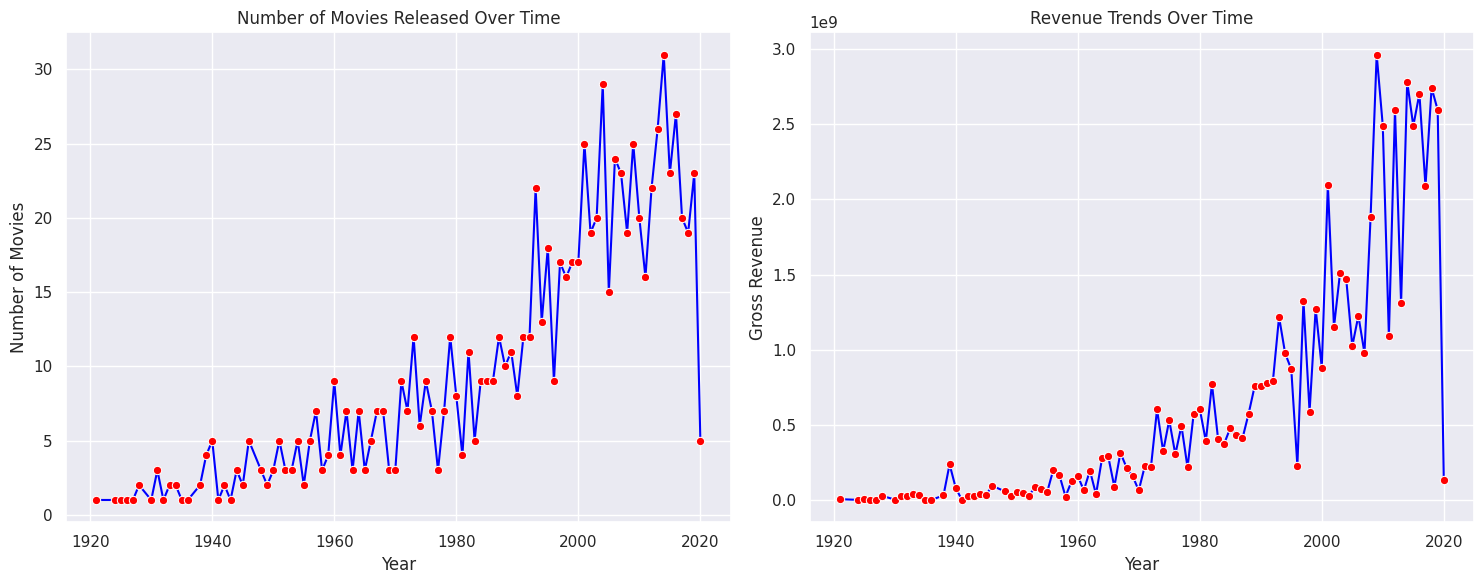

In [157]:
# Trends of movies by year
movies_by_year = df.groupby(df['Released_Year'].dt.year)['Series_Title'].count().reset_index()
movies_by_year = movies_by_year.rename(columns={'Series_Title': 'Number of Movies'})
movies_by_year['Released_Year'] = movies_by_year['Released_Year'].astype(int)

# Revenue trends over time
revenue_trend = df.groupby(df['Released_Year'].dt.year)['Gross'].sum().reset_index()
revenue_trend['Released_Year'] = revenue_trend['Released_Year'].astype(int)

# Plotting these into line plot side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(x='Released_Year', y='Number of Movies', data=movies_by_year, marker='o', markerfacecolor='red', color='blue', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies Released Over Time')

sns.lineplot(x='Released_Year', y='Gross', data=revenue_trend, marker='o', markerfacecolor='red', color='blue', ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Gross Revenue')
ax[1].set_title('Revenue Trends Over Time')

plt.tight_layout()
plt.show()

### **Director and Cast Insights**

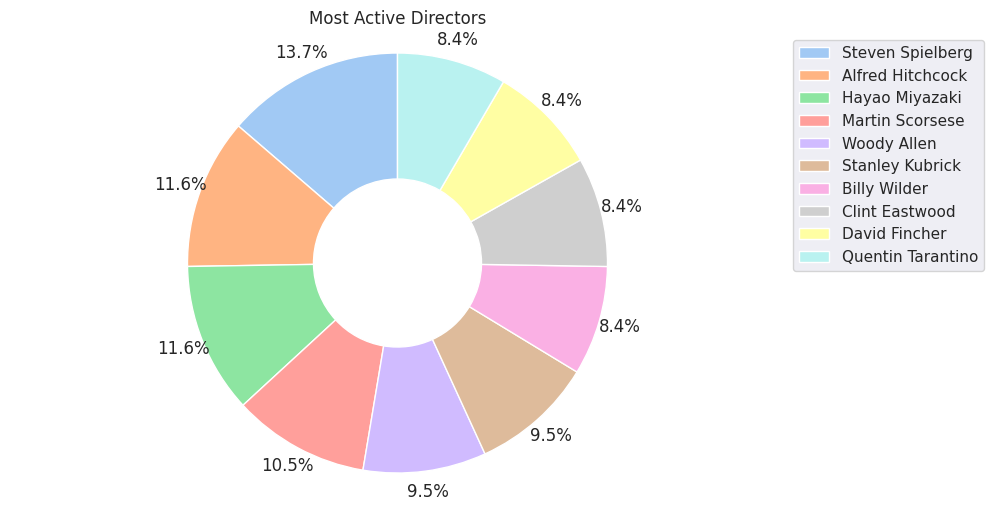

In [168]:
# Identifying the most active directors
most_active_directors = df['Director'].value_counts().reset_index().head(10)
most_active_directors = most_active_directors.rename(columns={'count': 'Number of Movies'})

# Visualizing using pie chart
plt.figure(figsize=(10, 6))

plt.pie(most_active_directors['Number of Movies'], autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'width': 0.6})
plt.title('Most Active Directors')
plt.axis('equal')
plt.legend(labels=most_active_directors['Director'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [175]:
# top performing directors
top_directors = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).reset_index().head(10)
top_directors['Gross'] = top_directors['Gross'].astype(int)
top_directors['Gross'] = top_directors['Gross'].apply(lambda x: f'${x:,.0f}')
top_directors

,Director,Gross
0,Anthony Russo,"$551,259,850"
1,Gareth Edwards,"$532,177,324"
2,J.J. Abrams,"$474,390,301"
3,Josh Cooley,"$434,038,008"
4,Roger Allers,"$422,783,777"
5,Tim Miller,"$363,070,709"
6,James Gunn,"$361,494,850"
7,James Cameron,"$349,647,320"
8,Byron Howard,"$341,268,248"
9,David Yates,"$326,317,907"


In [192]:
from itertools import combinations

def get_best_star_duos(df):
    # Create an empty dictionary to store pairs and their counts
    pair_counts = {}

    # Iterate through each movie row
    for _, row in df.iterrows():
        # Extract the stars
        stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]

        # Filter out any missing or unknown values (e.g., NaN or 'Unknown')
        stars = [star for star in stars if star and star != 'Unknown']

        # Generate all possible unique combinations of stars in this row
        star_combinations = combinations(stars, 2)  # All 2-combinations of stars

        # Count the frequency of each star pair
        for pair in star_combinations:
            pair = tuple(sorted(pair))  # Ensure consistency (e.g., ('Star1', 'Star2') == ('Star2', 'Star1'))
            if pair in pair_counts:
                pair_counts[pair] += 1
            else:
                pair_counts[pair] = 1

    # Convert the dictionary to a Pandas Series and sort by frequency
    pair_counts_series = pd.Series(pair_counts).sort_values(ascending=False)

    # Return the most frequent pair (or top N if needed)
    best_duo = pair_counts_series.head(5)  # You can adjust this to return top N duos if desired
    return best_duo

best_duo = get_best_star_duos(df)
best_duo

,,0
Daniel Radcliffe,Rupert Grint,6
Emma Watson,Rupert Grint,5
Daniel Radcliffe,Emma Watson,5
Tim Allen,Tom Hanks,4
Joe Pesci,Robert De Niro,4


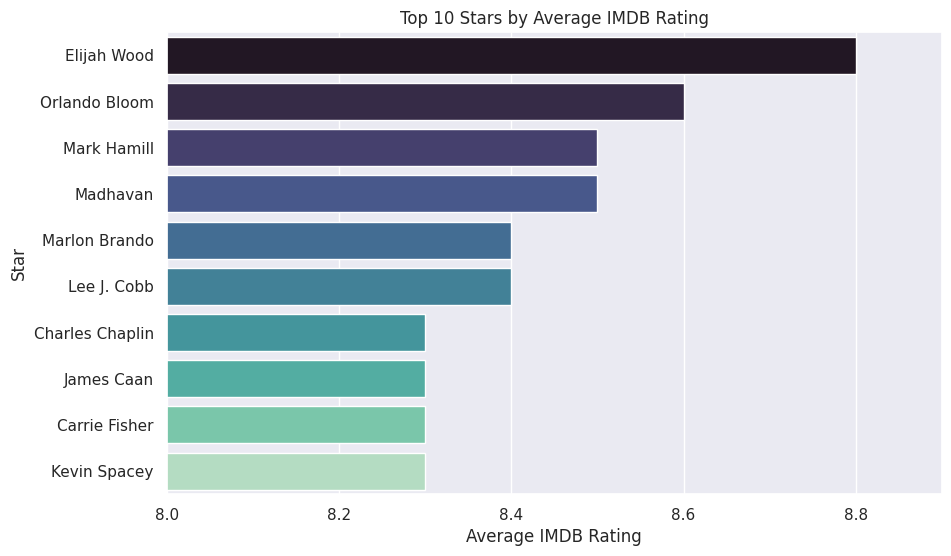

In [314]:
stars_long = pd.melt(
    df,
    id_vars = ['IMDB_Rating'],
    value_vars = ['Star1','Star2','Star3','Star4'],
    var_name = 'Star_Position',
    value_name = 'Star'
)

# Calculate average IMDB rating for each star
star_ratings = stars_long.groupby('Star')['IMDB_Rating'].mean()

# Count the number of movies each star has appeared in
star_movie_counts = stars_long['Star'].value_counts()

# Filter for stars with at least 3 movies (you can adjust this threshold)
significant_stars = star_movie_counts[star_movie_counts >= 3].index

# Filter the star ratings to include only significant stars
significant_star_ratings = star_ratings.loc[significant_stars].sort_values(ascending=False).reset_index()
significant_star_ratings['IMDB_Rating'] = significant_star_ratings['IMDB_Rating'].round(1)

colors = sns.color_palette("mako", len(significant_star_ratings.head(10)))

plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Star', data=significant_star_ratings.head(10), palette=colors, hue='Star')
plt.xlabel('Average IMDB Rating')
plt.xlim(8, 8.9)
plt.ylabel('Star')
plt.title('Top 10 Stars by Average IMDB Rating')
plt.show()


### **Correlation Analysis**

In [280]:
# Rating vs. Revenue: Investigate if movies with higher IMDB ratings tend to earn more revenue
correlation_rating = df['IMDB_Rating'].corr(df['Gross'])

# Runtime vs. Rating: Analyze whether longer movies are rated higher or lower
correlation_runtime = df['Runtime'].corr(df['IMDB_Rating'])

# Meta Score vs. IMDB Rating: Examine the correlation between these two measures of quality
correlation_metascore = df['Meta_score'].corr(df['IMDB_Rating'])

# Votes vs. Revenue: Check if movies with more votes on IMDB tend to have higher gross revenues.
correlation_votes = df['No_of_Votes'].corr(df['Gross'])

# Votes vs. Rating
correlation_votes_rating = df['No_of_Votes'].corr(df['IMDB_Rating'])

corr_data = pd.DataFrame({
    'Correlation': [correlation_rating, correlation_runtime, correlation_metascore, correlation_votes, correlation_votes_rating],
    'Variable': ['Rating vs. Revenue', 'Runtime vs. Rating', 'Meta Score vs. IMDB Rating', 'Votes vs. Revenue', 'Votes vs. Rating']
})

corr_data

,Correlation,Variable
0,0.086546,Rating vs. Revenue
1,0.245843,Runtime vs. Rating
2,0.261897,Meta Score vs. IMDB Rating
3,0.574750,Votes vs. Revenue
4,0.517050,Votes vs. Rating


### **Certification Analysis**

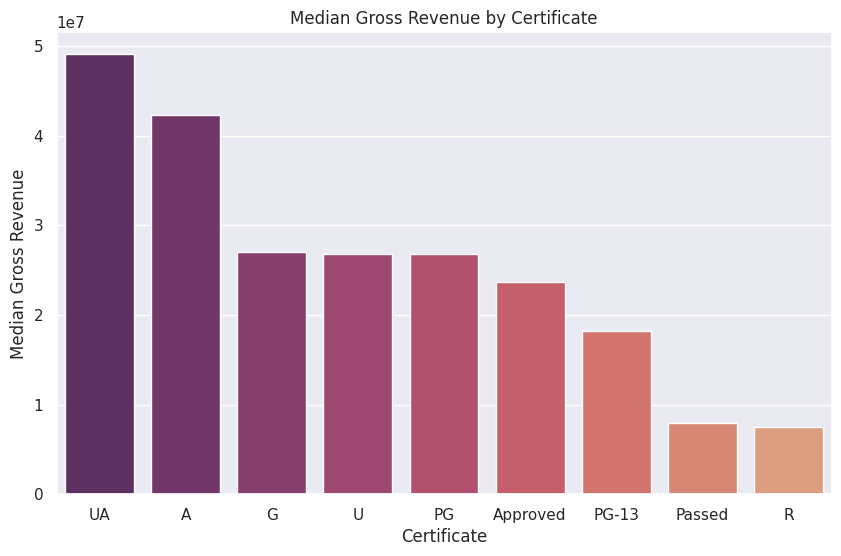

In [312]:
certification_stats = df.groupby('Certificate').agg({'IMDB_Rating': 'mean', 'Gross': 'median'})
certification_stats['IMDB_Rating'] = certification_stats['IMDB_Rating'].round(1)

# Add a count of movies per certification
certification_count = df['Certificate'].value_counts()
certification_count


# Filter certifications with at least 5 movies (adjust threshold as needed)
significant_certifications = certification_count[certification_count >= 5].index

# Preview the filtered results
significant_certifications_stats = certification_stats.loc[significant_certifications].sort_values(by='Gross', ascending=False).reset_index()
significant_certifications_stats['Gross'] = significant_certifications_stats['Gross'].astype(int)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("flare", len(significant_certifications_stats))
sns.barplot(x='Certificate', y='Gross', data=significant_certifications_stats, palette=colors[::-1], hue='Certificate')
plt.xlabel('Certificate')
plt.ylabel('Median Gross Revenue')
plt.title('Median Gross Revenue by Certificate')
plt.show()

### **Runtime Analysis**

In [318]:
# Calculate average IMDB rating for each runtime category
runtime_rating_stats = df.groupby('Runtime_Category')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()

# Print the results
runtime_rating_stats

,Runtime_Category,IMDB_Rating
0,Long,8.008036
1,Short,7.916393
2,Medium,7.891538


In [322]:
# Calculate Gross Revenue for each runtime category
runtime_revenue_stats = df.groupby('Runtime_Category')['Gross'].sum().sort_values(ascending=False).reset_index()
runtime_revenue_stats['Gross'] = runtime_revenue_stats['Gross'].astype(int)
runtime_revenue_stats['Gross'] = runtime_revenue_stats['Gross'].apply(lambda x: f'${x:,.0f}')

# Print the results
runtime_revenue_stats

,Runtime_Category,Gross
0,Long,"$35,511,617,435"
1,Medium,"$21,166,502,702"
2,Short,"$2,752,931,300"


### **Text Analysis on Overview**

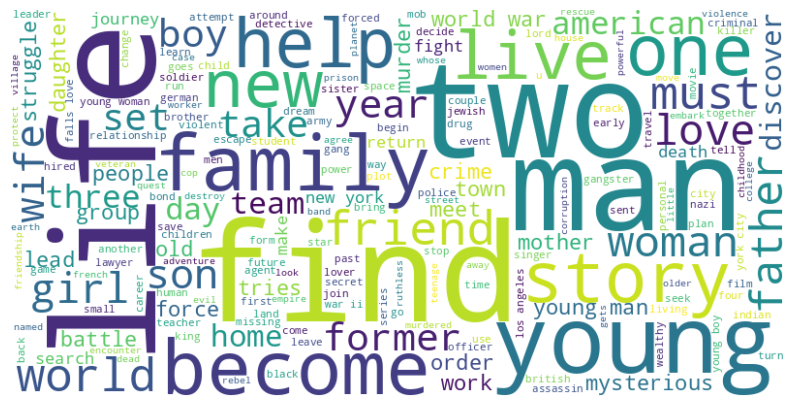

In [352]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
  text = re.sub(r'[^A-Za-z\s]', '', text)
  text = text.lower()
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

# Applying the function
df['Processed_Overview'] = df['Overview'].apply(preprocess_text)

from collections import Counter

# Combine all words for high-rated
high_rated_words = [word for sublist in df['Processed_Overview'] for word in sublist]

# Count word frequencies
high_rated_word_counts = Counter(high_rated_words)

from wordcloud import WordCloud

high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(high_rated_words))

plt.figure(figsize=(10, 6))
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Underrated Gems**

In [375]:
high_rating_threshold = 8.0
low_revenue_threshold = df['Gross'].median()

underrated_gems = df[(df['IMDB_Rating'] >= high_rating_threshold) & (df['Gross'] < low_revenue_threshold)]

underrated_gems = underrated_gems[['Series_Title', 'IMDB_Rating', 'Gross']]
underrated_gems['Gross'] = underrated_gems['Gross'].astype(int)

top_underrated_gems = underrated_gems.sort_values(by='Gross', ascending=True).head(10).reset_index()
top_underrated_gems.drop('index', axis=1, inplace=True)
top_underrated_gems['Gross'] = top_underrated_gems['Gross'].astype(int)
top_underrated_gems['Gross'] = top_underrated_gems['Gross'].apply(lambda x: f'${x:,.0f}')
top_underrated_gems

,Series_Title,IMDB_Rating,Gross
0,Udaan,8.2,"$7,461"
1,Tropa de Elite,8.0,"$8,060"
2,All About Eve,8.2,"$10,177"
3,Dev.D,8.0,"$10,950"
4,Dial M for Murder,8.2,"$12,562"
5,Salinui chueok,8.1,"$14,131"
6,City Lights,8.5,"$19,181"
7,La passion de Jeanne d'Arc,8.1,"$21,877"
8,M - Eine Stadt sucht einen Mörder,8.3,"$28,877"
9,Le samouraï,8.1,"$39,481"
